In [1]:
import pandas as pd

In [ ]:
data_path = 'Data/BF_Subject_Training.csv'

In [ ]:
raw_data_path = '/content/BF_Titles_And_Classifications_LOCAdjusted_v2.csv'

In [ ]:
df = pd.read_csv(raw_data_path)
df = df.drop("ID", axis=1)
df.head()

,Title,Call_Number
0,advances in descriptive psychology official an...,BF1-37:Psychology
1,advances in descriptive psychology official an...,BF1-37:Psychology
2,advances in descriptive psychology official an...,BF1-37:Psychology
3,advances in descriptive psychology official an...,BF1-37:Psychology
4,duke university psychological monographs,BF1-37:Psychology


In [ ]:
raw_data_path = '/content/BF_Title_Subject.csv'
df = pd.read_csv(raw_data_path)
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Call_Number,Title
0,BF173-175:Psychoanalysis,complex archetype symbol in the psychology of ...
1,BF1562-1584:Witchcraft,hexen und dämonenglaube im lande braunschweig ...
2,BF65-172:Psychology,qualitative strategies for ethnocultural resea...
3,BF636-637:Applied psychology,the art of persuading people by james a worsha...
4,BF173-175:Psychoanalysis,trauma and organizations associations institut...


In [ ]:
raw_data_path = '/content/BF_Title_Subject_Notes_Training.csv'
df = pd.read_csv(raw_data_path)
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Call_Number,Title
0,BF173-175:Psychoanalysis,complex archetype symbol in the psychology of ...
1,BF1562-1584:Witchcraft,hexen und dämonenglaube im lande braunschweig ...
2,BF65-172:Psychology,qualitative strategies for ethnocultural resea...
3,BF636-637:Applied psychology,the art of persuading people by james a worsha...
4,BF173-175:Psychoanalysis,trauma and organizations associations institut...


In [ ]:
raw_data_path = '/content/BF_Subject_Training.csv'
df = pd.read_csv(raw_data_path)
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Title,Call_Number
0,Jung C G Carl Gustav 18751961 Psychoanalysis,BF173-175:Psychoanalysis
1,Witchcraft Germany Braunschweig Region Demon...,BF1562-1584:Witchcraft
2,Psychology Qualitative research Ethnology Me...,BF65-172:Psychology
3,Selling Psychology Applied,BF636-637:Applied psychology
4,Associations institutions etc Stress Psycholog...,BF173-175:Psychoanalysis


In [ ]:
raw_data_path = '/content/BF_Subject_OnlyPsychology_Training.csv'
df = pd.read_csv(raw_data_path)
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Title,Call_Number
0,jung c g carl gustav 18751961 psychoanalysis,BF173-175:Psychoanalysis
1,psychology qualitative research ethnology me...,BF65-172:Psychology
2,selling psychology applied,BF636-637:Applied psychology
3,associations institutions etc stress psycholog...,BF173-175:Psychoanalysis
4,freud sigmund 18561939 skinner b f burrhus fre...,BF65-172:Psychology


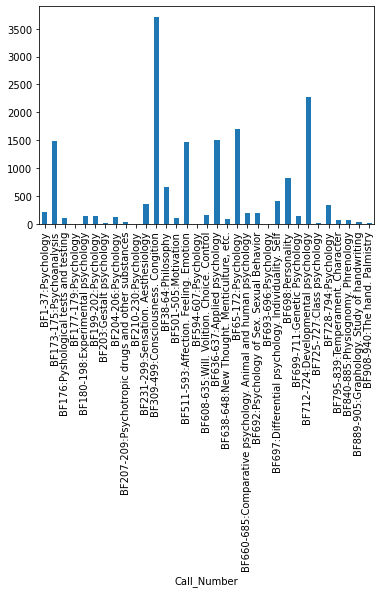

In [ ]:
df.groupby(['Call_Number']).size().plot.bar()

In [ ]:
!pip install transformers==4.6.0

     |████████████████████████████████| 2.3 MB 31.4 MB/s 
     |████████████████████████████████| 895 kB 53.5 MB/s 
     |████████████████████████████████| 3.3 MB 55.0 MB/s 


In [ ]:
vals = pd.unique(df['Call_Number'])
print(len(vals))

33


In [ ]:
labels = {value: key for (key, value) in enumerate(vals)}
print(labels)

{'BF173-175:Psychoanalysis': 0, 'BF65-172:Psychology': 1, 'BF636-637:Applied psychology': 2, 'BF712-724:Developmental psychology': 3, 'BF210-230:Psychology': 4, 'BF840-885:Physiognomy. Phrenology': 5, 'BF699-711:Genetic Psychology': 6, 'BF698:Personality': 7, 'BF199-202:Psychology': 8, 'BF309-499:Consciousness. Congition': 9, 'BF176:Pyshological tests and testing': 10, 'BF1-37:Psychology': 11, 'BF608-635:Will. Volition. Choice. Control': 12, 'BF697:Differential psychology. Individuality. Self': 13, 'BF638-648:New Thought. Menticulture, etc.': 14, 'BF231-299:Sensation. Aesthesiology': 15, 'BF207-209:Psychotropic drugs and other substances': 16, 'BF38-64:Philosophy': 17, 'BF692:Psychology of Sex. Sexual Behavior': 18, 'BF511-593:Affection. Feeling. Emotion': 19, 'BF728-794:Psychology': 20, 'BF501-505:Motivation': 21, 'BF660-685:Comparative psychology. Animal and human psychology': 22, 'BF204-206:Psychology': 23, 'BF889-905:Graphology. Study of handwriting': 24, 'BF180-198:Experimental ps

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
'''
labels = {'BF1-37:Psychology':0, 'BF38-64:Philosophy':1, 'BF65-172:Psychology':2,
          'BF173-175:Psychoanalysis':3, 'BF176:Pyshological tests and testing':4,
          'BF180-198:Experimental psychology':5, 'BF199-202:Psychology':6,
          'BF203:Gestalt psychology':7, 'BF204-206:Psychology':8,
          'BF207-209:Psychotropic drugs and other substances':9,
          'BF210-230:Psychology':10, 'BF231-299:Sensation. Aesthesiology':11,
          'BF300-308:Psychology':12, 'BF309-499:Consciousness. Congition':13,
          'BF501-505:Motivation':14, 'BF511-593:Affection. Feeling. Emotion':15,
          'BF594-607:Psychology':16, 'BF608-635:Will. Volition. Choice. Control':17,
          'BF636-637:Applied psychology':18,
          'BF638-648:New Thought. Menticulture, etc.':19,
          'BF660-685:Comparative psychology. Animal and human psychology':20,
          'BF692:Psychology of Sex. Sexual Behavior':21, 'BF693-696:Psychology':22,
          'BF697:Differential psychology. Individuality. Self':23, 'BF698:Personality':24,
          'BF699-711:Genetic Psychology':25, 'BF712-724:Developmental psychology':26,
          'BF725-727:Class psychology':27, 'BF728-794:Psychology':28,
          'BF795-839:Temperament. Character':29, 'BF840-885:Physiognomy. Phrenology':30,
          'BF889-905:Graphology. Study of handwriting':31,
          'BF908-940:The hand. Palmistry':32,
          'BF1001-1045:Psychic research. Psychology of the conscious.':33,
          'BF1048-1108:Hallucinations. Sleep. Dreaming. Visions':34,
          'BF1111-1156:Hypnotism. Suggestions. Mesmerism. Subliminal Projection':35,
          'BF1161-1171:Telepathy. Mind reading. Thought transference':36,
          'BF1172-1227:Parapsychology':37, 'BF1228-1389:Spiritualism':38,
          'BF1404-1443:Occult sciences':39,
          'BF1444-1486:Ghosts. Apparitions. Hauntings':40,
          'BF1487-1500:Occult sciences':41,
          'BF1501-1561:Demonology. Satanism. Possession':42, 'BF1562-1584:Witchcraft':43,
          'BF1585-1623:Magic. Hermetics. Necromancy':44, 'BF1624-1650:Occult sciences':45,
          'BF1651-1729:Astrology':46, 'BF1730-1744:Occult sciences':47,
          'BF1745-1779:Oracles. Sibyls. Diviniations':48,
          'BF1783-1815:Seers. Prophets. Prophecies':49, 'BF1845-1891:Fortune-telling':50,
          'BF1892-2049:Occult sciences':51,
          'BF2050-2055:Human-alien encounters. Contact between humans and extraterrestials':52,
          'BF2056-end:Occult sciences':53}
'''

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

"\nlabels = {'BF1-37:Psychology':0, 'BF38-64:Philosophy':1, 'BF65-172:Psychology':2,\n          'BF173-175:Psychoanalysis':3, 'BF176:Pyshological tests and testing':4,\n          'BF180-198:Experimental psychology':5, 'BF199-202:Psychology':6,\n          'BF203:Gestalt psychology':7, 'BF204-206:Psychology':8,\n          'BF207-209:Psychotropic drugs and other substances':9,\n          'BF210-230:Psychology':10, 'BF231-299:Sensation. Aesthesiology':11,\n          'BF300-308:Psychology':12, 'BF309-499:Consciousness. Congition':13,\n          'BF501-505:Motivation':14, 'BF511-593:Affection. Feeling. Emotion':15,\n          'BF594-607:Psychology':16, 'BF608-635:Will. Volition. Choice. Control':17,\n          'BF636-637:Applied psychology':18,\n          'BF638-648:New Thought. Menticulture, etc.':19,\n          'BF660-685:Comparative psychology. Animal and human psychology':20,\n          'BF692:Psychology of Sex. Sexual Behavior':21, 'BF693-696:Psychology':22,\n          'BF697:Differenti

In [ ]:
class dataset(torch.utils.data.Dataset):
  def __init__(self, df):
    self.labels = [labels[label] for label in df['Call_Number']]
    self.texts = [tokenizer(text,
                            padding='max_length',max_length=512, truncation=True,
                            return_tensors="pt") for text in df['Title']]

  def __len__(self):
      return len(self.labels)

  def __getitem__(self, idx):
    batch_texts = self.get_batch_texts(idx)
    batch_y = self.get_batch_labels(idx)

    return batch_texts, batch_y
  def classes(self):
    return self.labels

  def get_batch_labels(self, idx):
    return np.array(self.labels[idx])

  def get_batch_texts(self, idx):
    return self.texts[idx]

    

In [ ]:
np.random.seed(112)
rand = np.random.randint(1,high=100)
print(rand)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=rand),
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train), len(df_val), len(df_test))

44
13246 1656 1656


In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):
  def __init__(self, dropout=0.5):
    super(BertClassifier, self).__init__()

    self.bert = BertModel.from_pretrained('bert-base-cased')
    self.dropout = nn.Dropout(dropout)
    self.linear = nn.Linear(768, 33) # Change depending on dataset size
    self.relu = nn.ReLU()

  def forward(self, input_id, mask):
    _, pooled_output = self.bert(input_ids=input_id, attention_mask=mask, return_dict=False)
    dropout_output = self.dropout(pooled_output)
    linear_output = self.linear(dropout_output)
    final_layer = self.relu(linear_output)

    return final_layer

In [ ]:
from torch.optim import Adam
from tqdm import tqdm


def train(model, train_data, val_data, learning_rate, epoch):
  training_dataset, val_dataset = dataset(train_data), dataset(val_data)


  train_dataloader = torch.utils.data.DataLoader(training_dataset, batch_size=2, shuffle=True)
  val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=2)

  use_cuda = torch.cuda.is_available()

  device = torch.device("cuda" if use_cuda else "cpu")

  criterion = nn.CrossEntropyLoss()
  optimizer = Adam(model.parameters(), lr=learning_rate)

  prev_val_acc = 0

  if use_cuda:
    model = model.cuda()
    criterion = criterion.cuda()
  
  for epoch_num in range(epoch):

    total_acc_train = 0
    total_loss_train = 0

    for train_input, train_label in tqdm(train_dataloader):
      train_label = train_label.to(device)
      mask = train_input['attention_mask'].to(device)
      input_id = train_input['input_ids'].squeeze(1).to(device)


      output = model(input_id, mask)

      batch_loss = criterion(output, train_label)
      total_loss_train += batch_loss.item()

      acc = (output.argmax(dim=1) == train_label).sum().item()
      total_acc_train += acc

      model.zero_grad()
      batch_loss.backward()
      optimizer.step()

    
    total_acc_val = 0
    total_loss_val = 0

    with torch.no_grad():
      for val_input, val_label in val_dataloader:
        val_label = val_label.to(device)
        mask = val_input['attention_mask'].to(device)
        input_id = val_input['input_ids'].squeeze(1).to(device)

        output = model(input_id, mask)

        batch_loss = criterion(output, val_label)
        total_loss_val += batch_loss.item()

        acc = (output.argmax(dim=1) == val_label).sum().item()
        total_acc_val += acc
    print(
        f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
        | Train Accuracy: {total_acc_train / len(train_data): .3f} \
        | Val Loss: {total_loss_val / len(val_data): .3f} \
        | Val Accuracy: {total_acc_val / len(val_data): .3f}')
    '''
    if prev_val_acc > total_acc_val / len(val_data):
      print("Breaking early because validation accuracy has decreased")
      break
    else:
      prev_val_acc = total_acc_val / len(val_data)
    '''
      

In [ ]:
if 'model' in locals():
  del model

model = BertClassifier()
LR = 1e-6
EPOCHS = 20
train(model, df_train, df_val, LR, EPOCHS)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 6623/6623 [23:54<00:00,  4.62it/s]


Epochs: 1 | Train Loss:  1.150         | Train Accuracy:  0.465         | Val Loss:  0.747         | Val Accuracy:  0.671


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 2 | Train Loss:  0.595         | Train Accuracy:  0.742         | Val Loss:  0.488         | Val Accuracy:  0.790


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 3 | Train Loss:  0.413         | Train Accuracy:  0.823         | Val Loss:  0.393         | Val Accuracy:  0.829


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 4 | Train Loss:  0.321         | Train Accuracy:  0.867         | Val Loss:  0.343         | Val Accuracy:  0.849


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 5 | Train Loss:  0.255         | Train Accuracy:  0.901         | Val Loss:  0.311         | Val Accuracy:  0.865


100%|██████████| 6623/6623 [23:58<00:00,  4.61it/s]


Epochs: 6 | Train Loss:  0.208         | Train Accuracy:  0.920         | Val Loss:  0.301         | Val Accuracy:  0.871


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 7 | Train Loss:  0.177         | Train Accuracy:  0.932         | Val Loss:  0.282         | Val Accuracy:  0.879


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 8 | Train Loss:  0.151         | Train Accuracy:  0.941         | Val Loss:  0.276         | Val Accuracy:  0.876


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 9 | Train Loss:  0.133         | Train Accuracy:  0.948         | Val Loss:  0.285         | Val Accuracy:  0.868


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 10 | Train Loss:  0.120         | Train Accuracy:  0.950         | Val Loss:  0.281         | Val Accuracy:  0.871


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 11 | Train Loss:  0.106         | Train Accuracy:  0.955         | Val Loss:  0.279         | Val Accuracy:  0.876


100%|██████████| 6623/6623 [23:58<00:00,  4.60it/s]


Epochs: 12 | Train Loss:  0.098         | Train Accuracy:  0.957         | Val Loss:  0.282         | Val Accuracy:  0.874


100%|██████████| 6623/6623 [23:58<00:00,  4.61it/s]


Epochs: 13 | Train Loss:  0.089         | Train Accuracy:  0.960         | Val Loss:  0.286         | Val Accuracy:  0.874


100%|██████████| 6623/6623 [23:58<00:00,  4.61it/s]


Epochs: 14 | Train Loss:  0.083         | Train Accuracy:  0.962         | Val Loss:  0.282         | Val Accuracy:  0.880


100%|██████████| 6623/6623 [23:57<00:00,  4.61it/s]


Epochs: 15 | Train Loss:  0.077         | Train Accuracy:  0.964         | Val Loss:  0.294         | Val Accuracy:  0.873


 61%|██████    | 4033/6623 [14:35<09:22,  4.61it/s]

In [ ]:
def evaluate(model, test_data):
  test = dataset(test_data)

  test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")

  if use_cuda:
    model = model.cuda()

  total_acc_test = 0

  with torch.no_grad():
    for test_input, test_label in test_dataloader:
      test_label = test_label.to(device)
      mask= test_input['attention_mask'].to(device)
      input_id = test_input['input_ids'].squeeze(1).to(device)

      output = model(input_id, mask)

      acc = (output.argmax(dim=1) == test_label).sum().item()

      total_acc_test += acc
  
  print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')


evaluate(model, df_test)

Test Accuracy:  0.874


# Save Model to Checkpoint

In [ ]:
torch.save(model.state_dict(), "BERT_Classifier_20_epoch_subjects_only.pt")

# Load Model from Checkpoint


In [ ]:
load_model = BertClassifier()
load_model.load_state_dict(torch.load("BERT_Classifier_5_epoch.pt"))